In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols 
import seaborn as sns 
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import train_test_split 
from statsmodels.api import qqplot 
from scipy.stats import shapiro, ttest_ind
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

C:\Users\ADStudent\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data description

In [2]:
data = pd.read_excel("Student_data.xlsx")

In [3]:
data.head()

,StudentID,school2,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3,4,1,1,3,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3,3,1,1,3,4,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3,2,2,3,3,10,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2,2,1,1,5,2,15
4,5,GP,F,16,U,GT3,T,3,3,other,...,no,no,4,3,2,1,2,5,4,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
StudentID      395 non-null int64
school2        395 non-null object
sex            395 non-null object
age            395 non-null int64
address        395 non-null object
famsize        395 non-null object
Pstatus        395 non-null object
Medu           395 non-null int64
Fedu           395 non-null int64
Mjob           395 non-null object
Fjob           395 non-null object
reason         395 non-null object
guardian       395 non-null object
traveltime     395 non-null int64
studytime      395 non-null int64
failures       395 non-null int64
schoolsup      395 non-null object
famsup         395 non-null object
paid           395 non-null object
activities     395 non-null object
nursery        395 non-null object
higher         395 non-null object
internet       395 non-null object
romantic       395 non-null object
famrel         395 non-null int64
freetime       395 non-null 

In [5]:
data.shape

(395, 32)

In [6]:
print(data.columns.tolist())

['StudentID', 'school2', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Final_Grade']


In [7]:
data_num = data.select_dtypes(exclude = ["object"])
data_obj = data.select_dtypes(include = ["object"])

In [8]:
data_num.columns.tolist()

['StudentID',
 'age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'Final_Grade']

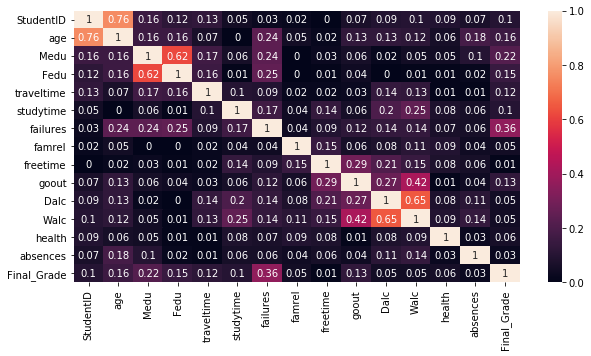

In [9]:
plt.figure(figsize = (10,5))
sns.heatmap(data_num.corr().abs().round(2), annot =True)

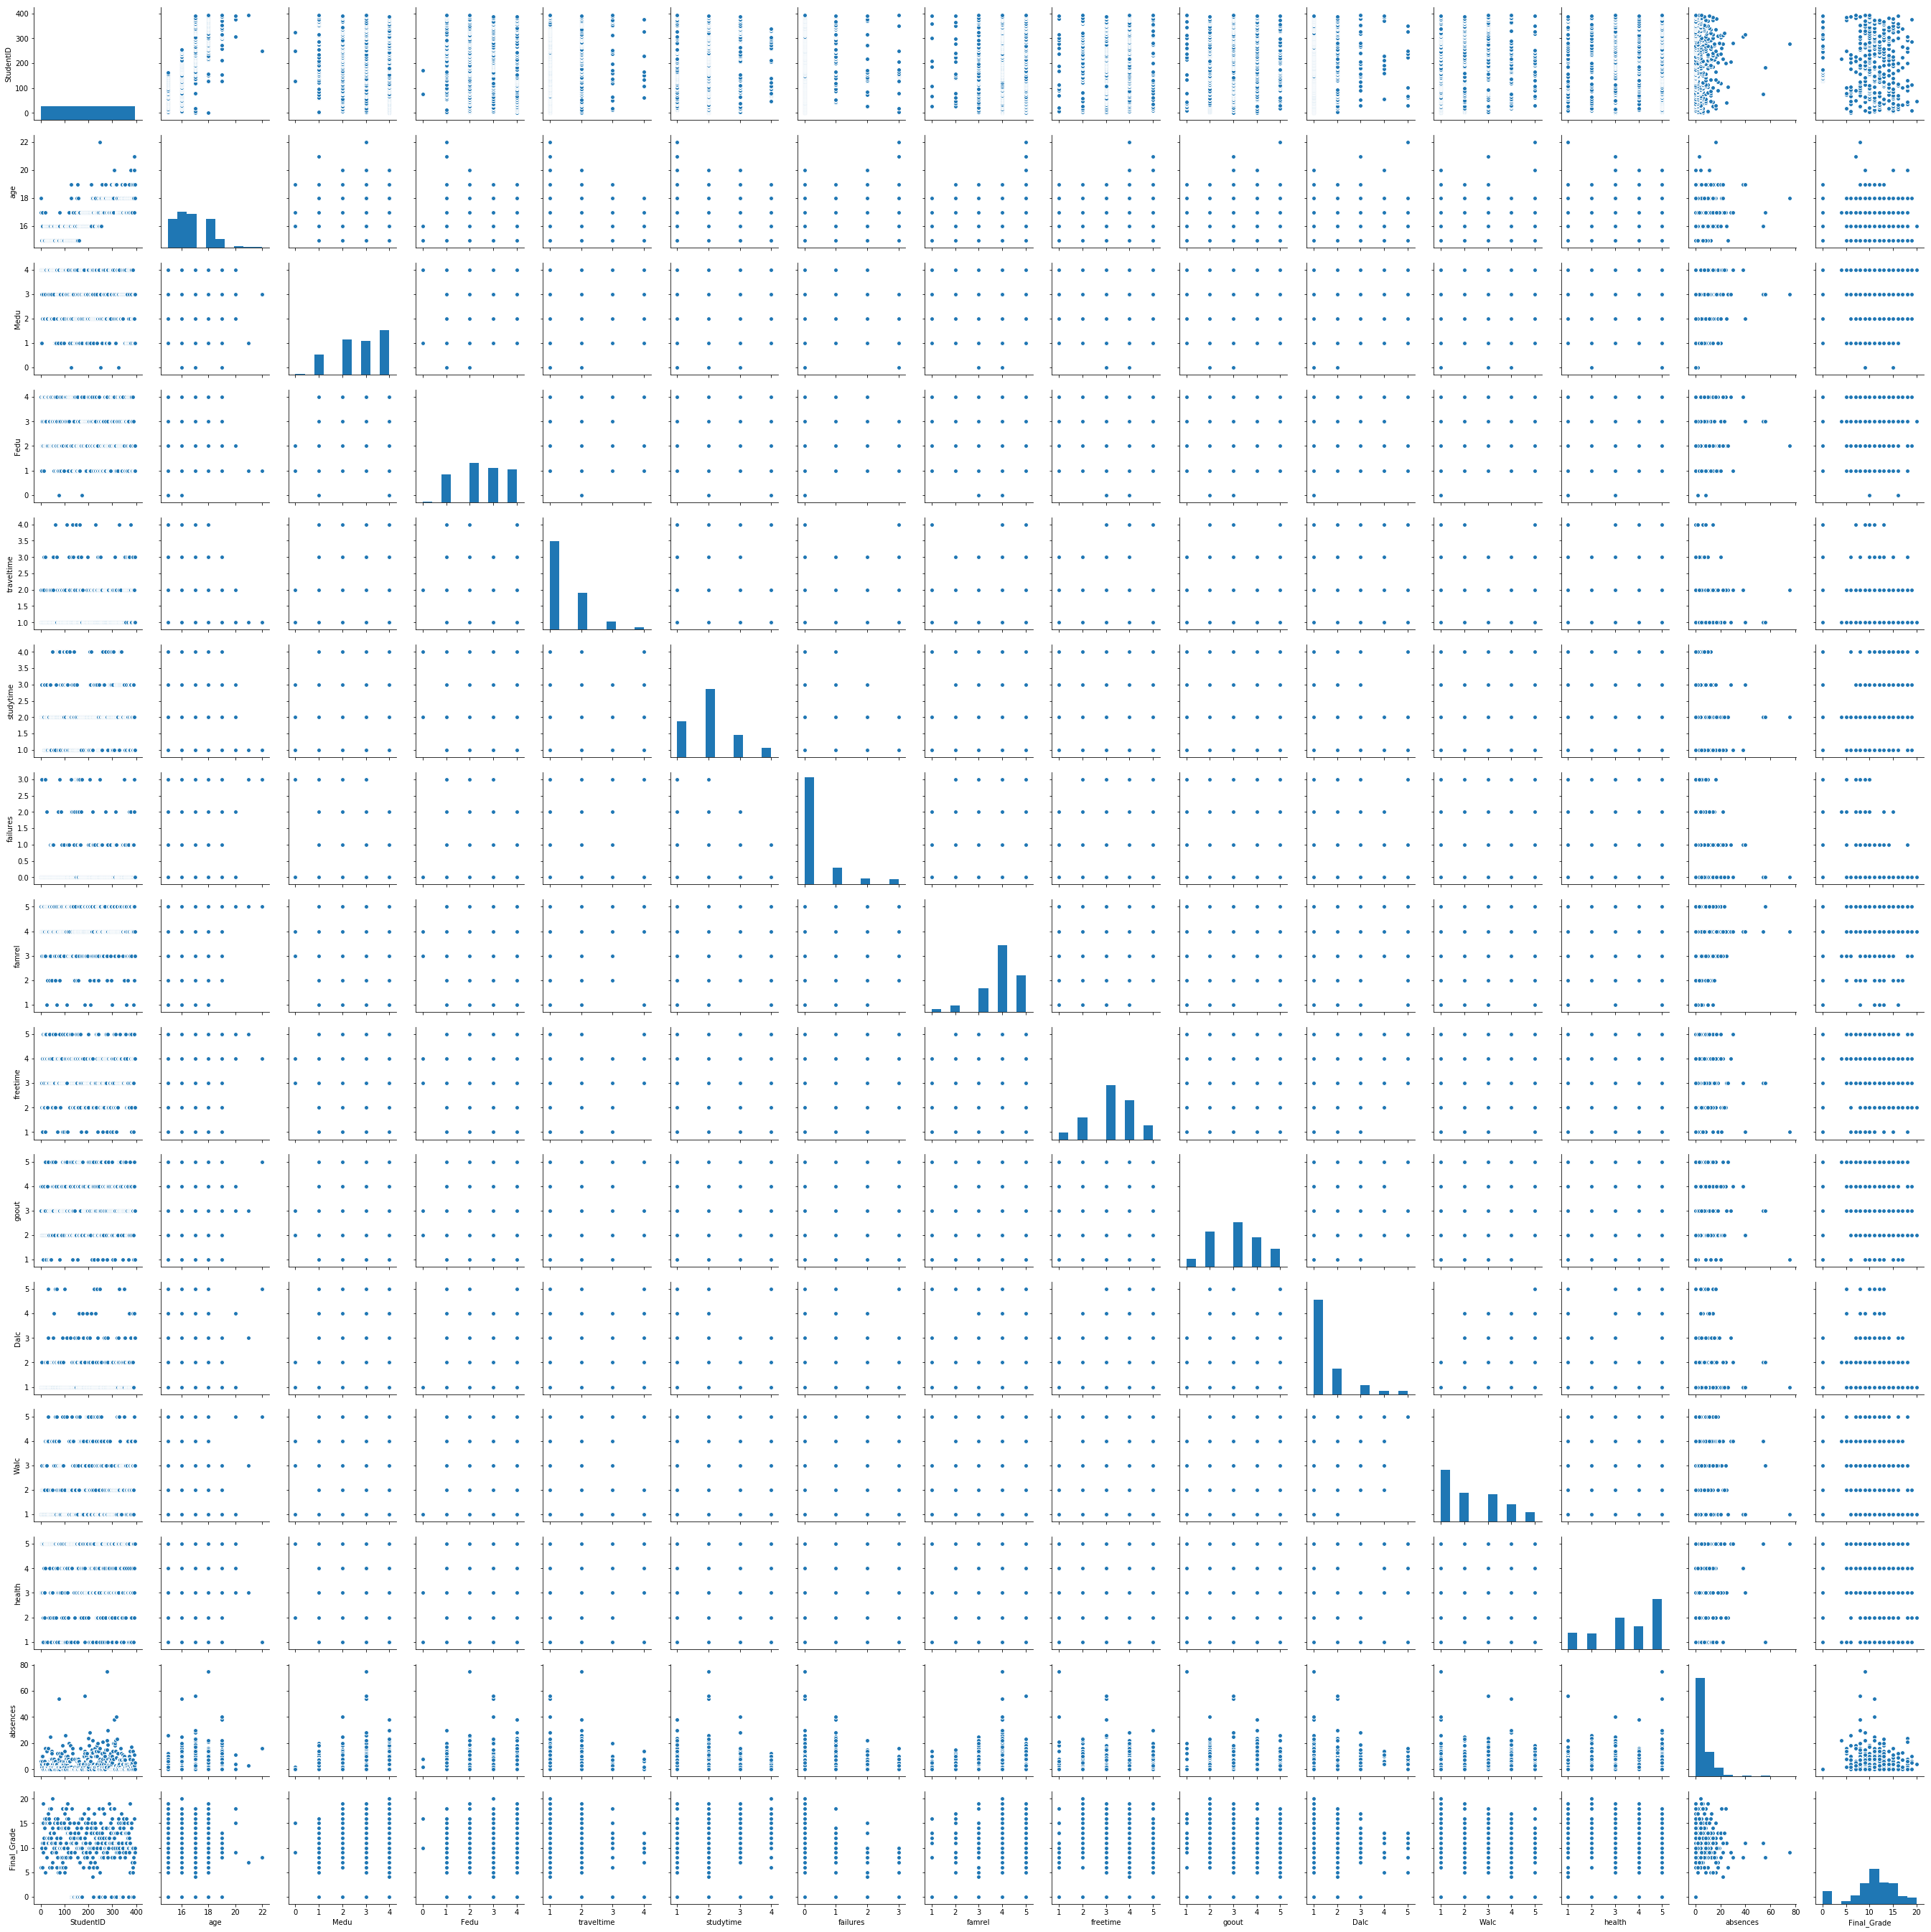

In [10]:
sns.pairplot(data_num)

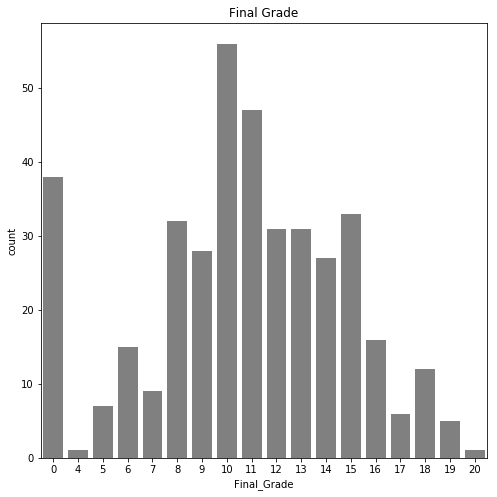

In [11]:
plt.figure(figsize=(8,8))
sns.countplot(data.Final_Grade, color="gray")
plt.title("Final Grade")
plt.show()

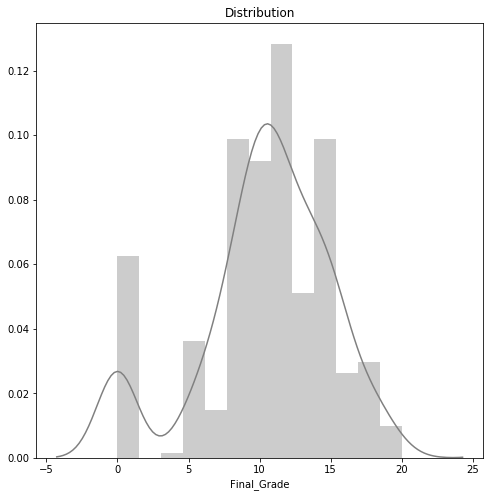

In [12]:
plt.figure(figsize=(8,8))
sns.distplot(data.Final_Grade,color="gray")
plt.title("Distribution")
plt.show()

In [13]:
data_num1=data_num.drop(['StudentID'], axis = 1 )

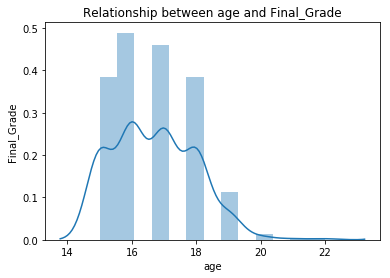

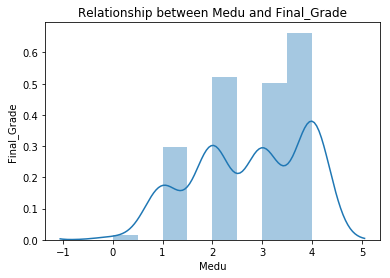

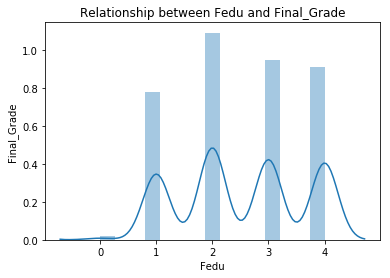

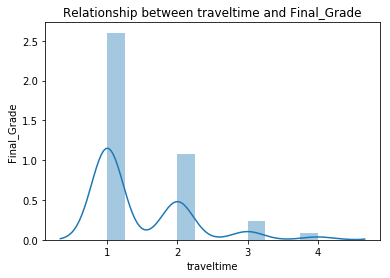

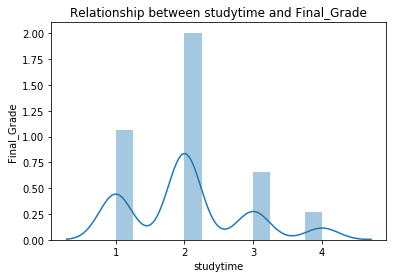

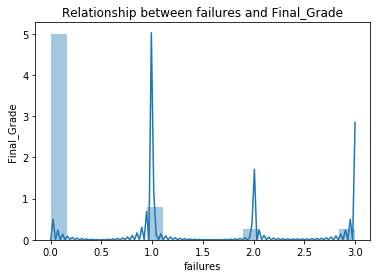

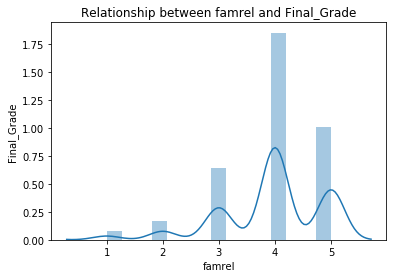

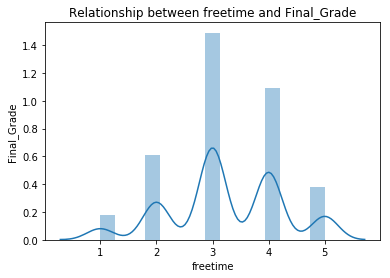

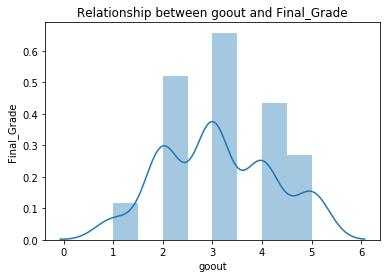

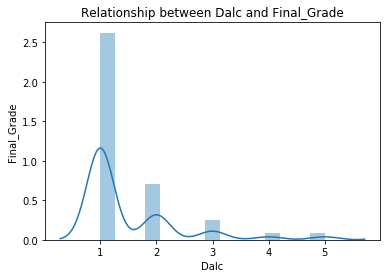

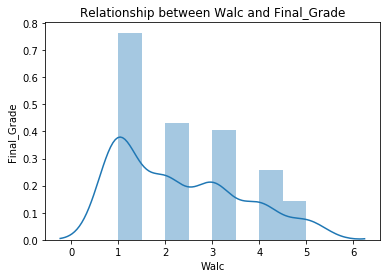

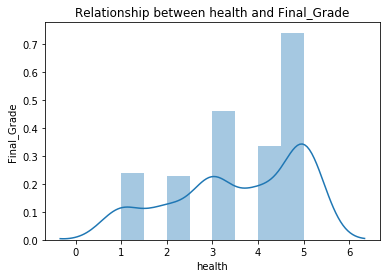

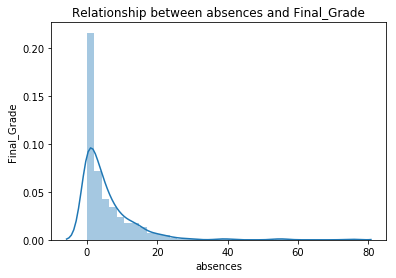

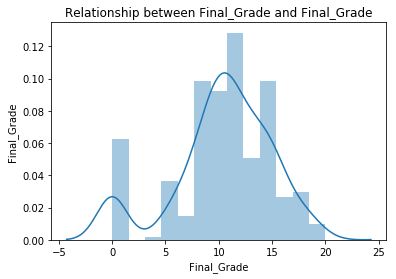

In [14]:
for i in data_num1:
    sns.distplot(data_num[i])
    plt.xlabel(i)
    plt.ylabel("Final_Grade")
    plt.title(f"Relationship between {i} and Final_Grade")
    plt.show()

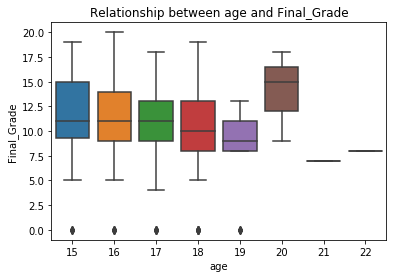

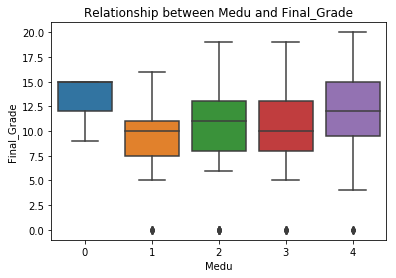

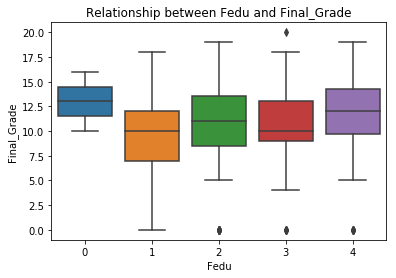

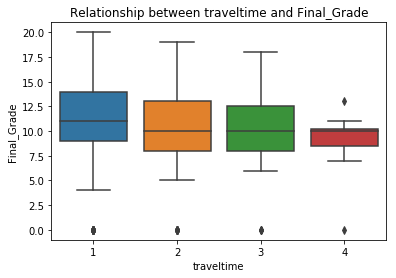

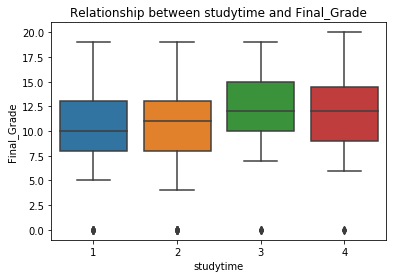

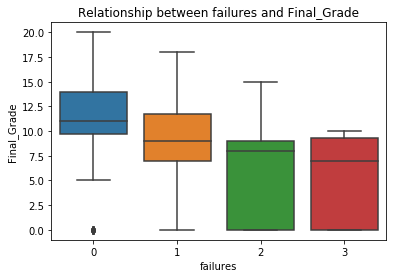

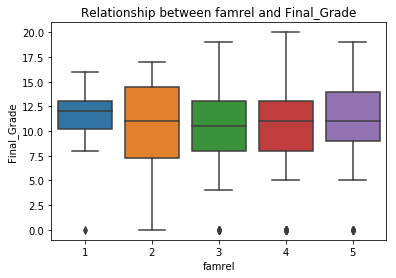

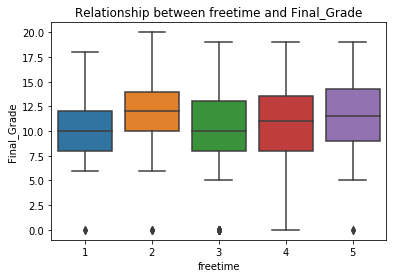

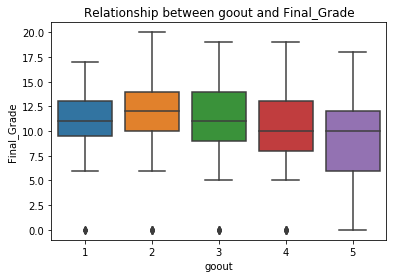

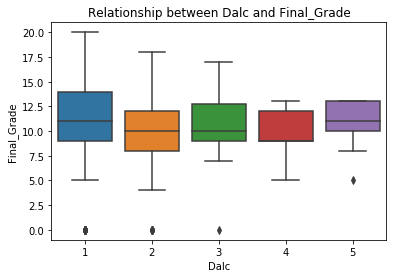

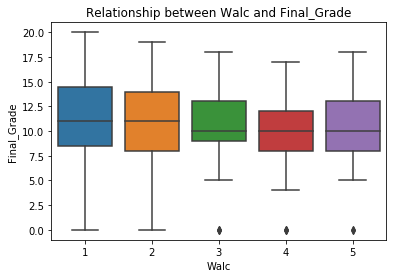

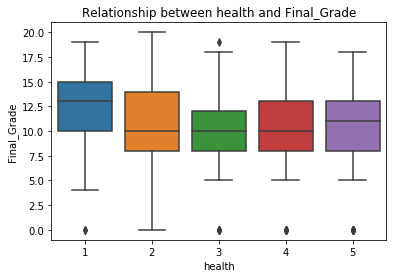

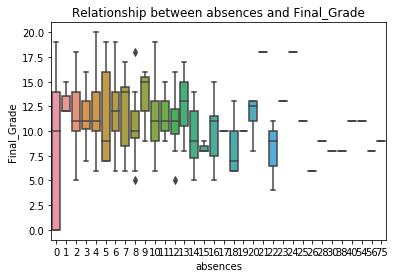

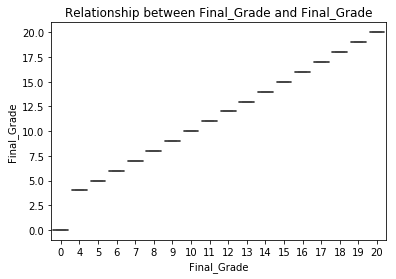

In [15]:
for i in data_num1:
    sns.boxplot(x=data[i], y=data['Final_Grade'])
    plt.title(f"Relationship between {i} and Final_Grade")
    plt.show()

## OLS method

In [16]:
data_dummies = pd.get_dummies(data_obj, drop_first = True)
data_dummies.head()

,school2_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,0,0,0,0,...,1,0,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,0,0,0,0,...,1,0,0,1,1,1,1,1,1,1
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,1,0,1,1,0,0


In [17]:
data_model = data_num.join(data_dummies, how = 'left')
data_model.shape

(395, 41)

In [18]:
Y = data_model.Final_Grade
X = data_model.drop('Final_Grade', axis = 1)
X = sm.add_constant(X)
X.shape + Y.values.reshape((-1,1)).shape

(395, 41, 395, 1)

In [19]:
x, x1, y, y1 = train_test_split(X, Y, test_size=0.25, random_state=42)
x.shape

(296, 41)

In [20]:
model_linear = sm.OLS(y, x)
results = model_linear.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     2.487
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           1.02e-05
Time:                        17:44:07   Log-Likelihood:                -816.32
No. Observations:                 296   AIC:                             1715.
Df Residuals:                     255   BIC:                             1866.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3308      6.266      1.489      0.138      -3.009      21.670
StudentID            -0.0051      0.004     -1.230      0.220      -0.013       0.003
age                  -0.0741      0.353     -0.210      0.834      -0.770       0.622
Medu                  0.4221      0.382      1.105      0.270      -0.330       1.174
Fedu                 -0.3817      0.329     -1.159      0.248      -1.030       0.267
traveltime           -0.0973      0.402     -0.242      0.809      -0.889       0.695
studytime             0.5852      0.349      1.676      0.095      -0.102       1.273
failures             -1.8259      0.395     -4.625      0.000      -2.603      -1.048
famrel                0.3279      0.302      1.085      0.279      -0.267       0.923
freetime              0.1907      0.271      0.703      0.483      -0.343       0.725
goout                -0.5790      0.275     -2.104      0.036      -1.121      -0.037
Dalc                 -0.3056      0.382     -0.801      0.424      -1.057       0.446
Walc                  0.2627      0.295      0.891      0.374      -0.318       0.844
health               -0.1220      0.185     -0.658      0.511      -0.487       0.243
absences              0.0561      0.032      1.754      0.081      -0.007       0.119
school2_MS            1.4289      1.005      1.421      0.157      -0.551       3.409
sex_M                 1.2941      0.604      2.141      0.033       0.104       2.484
address_U             0.4508      0.674      0.669      0.504      -0.877       1.779
famsize_LE3           0.4205      0.574      0.733      0.464      -0.709       1.550
Pstatus_T            -0.6146      0.871     -0.706      0.481      -2.330       1.101
Mjob_health           1.4466      1.286      1.125      0.262      -1.085       3.979
Mjob_other            0.1363      0.813      0.168      0.867      -1.465       1.737
Mjob_services         0.7967      0.891      0.894      0.372      -0.958       2.552
Mjob_teacher         -0.5635      1.207     -0.467      0.641      -2.941       1.814
Fjob_health           0.0923      1.585      0.058      0.954      -3.029       3.214
Fjob_other           -0.8369      1.101     -0.760      0.448      -3.006       1.332
Fjob_services        -0.3484      1.171     -0.297      0.766      -2.655       1.958
Fjob_teacher          0.8775      1.471      0.597      0.551      -2.019       3.774
reason_home          -0.4098      0.664     -0.617      0.537      -1.717       0.897
reason_other          0.5111      0.917      0.557      0.578      -1.296       2.318
reason_reputation     0.5977      0.681      0.878      0.381      -0.743       1.938
guardian_mother       0.6327      0.651      0.972      0.332      -0.649       1.914
guardian_other        1.1065      1.127      0.982      0.327      -1.113

In [21]:
y2=results.predict(x1)
print('R^2_test:', r2_score(y1, y2))
print('RMSE:', mean_squared_error(y1, y2)**0.5)

R^2_test: 0.19828061900999105
RMSE: 4.297661395596767


## Feature Engineering

In [22]:
p_values = results.pvalues.round(3).reset_index().rename(
    columns={
        'index':'features',
        0: 'p_value'
    }
).sort_values("p_value")


In [23]:
lp_data_df = p_values[p_values.p_value > 0.5]
lp_data = lp_data_df.features.tolist()
print(lp_data)

['address_U', 'health', 'reason_home', 'Fjob_teacher', 'reason_other', 'Mjob_teacher', 'Fjob_services', 'traveltime', 'age', 'Mjob_other', 'Fjob_health']


In [24]:
for feature in lp_data:
    train_x = x.drop([feature], axis = 1)
    test_x = x1.drop([feature], axis = 1)
    model = sm.OLS(y, train_x)
    results = model.fit()
    print(f"This is a evaluation of the model without {feature.upper()} feature")
    print("Train R^2:",results.rsquared.round(3))
    print("Train R^2 Adjusted:",results.rsquared_adj.round(3))
    y_pred=results.predict(test_x)
    print('R^2_test:', r2_score(y1, y_pred).round(3))
    print('RMSE test:', (mean_squared_error(y1, y_pred)**0.5).round(3))
    print()

This is a evaluation of the model without ADDRESS_U feature
Train R^2: 0.279
Train R^2 Adjusted: 0.17
R^2_test: 0.195
RMSE test: 4.308

This is a evaluation of the model without HEALTH feature
Train R^2: 0.279
Train R^2 Adjusted: 0.17
R^2_test: 0.192
RMSE test: 4.313

This is a evaluation of the model without REASON_HOME feature
Train R^2: 0.28
Train R^2 Adjusted: 0.17
R^2_test: 0.205
RMSE test: 4.279

This is a evaluation of the model without FJOB_TEACHER feature
Train R^2: 0.28
Train R^2 Adjusted: 0.17
R^2_test: 0.193
RMSE test: 4.311

This is a evaluation of the model without REASON_OTHER feature
Train R^2: 0.28
Train R^2 Adjusted: 0.17
R^2_test: 0.194
RMSE test: 4.31

This is a evaluation of the model without MJOB_TEACHER feature
Train R^2: 0.28
Train R^2 Adjusted: 0.17
R^2_test: 0.192
RMSE test: 4.315

This is a evaluation of the model without FJOB_SERVICES feature
Train R^2: 0.28
Train R^2 Adjusted: 0.171
R^2_test: 0.197
RMSE test: 4.301

This is a evaluation of the model without

In [25]:
data_model = data_num.join(data_dummies, how = 'left')
data_model.shape

(395, 41)

In [26]:
Y = data_model.Final_Grade
X = data_model.drop('Final_Grade', axis = 1)
X = sm.add_constant(X)
engineered_x, engineered_x1, engineered_y, engineered_y1 = train_test_split(
    X,
    Y,
    test_size=0.25,
    random_state=42
)
engineered_x.shape

(296, 41)

In [27]:
model_linear = sm.OLS(engineered_y, engineered_x)
results = model_linear.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     2.487
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           1.02e-05
Time:                        17:44:08   Log-Likelihood:                -816.32
No. Observations:                 296   AIC:                             1715.
Df Residuals:                     255   BIC:                             1866.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3308      6.266      1.489      0.138      -3.009      21.670
StudentID            -0.0051      0.004     -1.230      0.220      -0.013       0.003
age                  -0.0741      0.353     -0.210      0.834      -0.770       0.622
Medu                  0.4221      0.382      1.105      0.270      -0.330       1.174
Fedu                 -0.3817      0.329     -1.159      0.248      -1.030       0.267
traveltime           -0.0973      0.402     -0.242      0.809      -0.889       0.695
studytime             0.5852      0.349      1.676      0.095      -0.102       1.273
failures             -1.8259      0.395     -4.625      0.000      -2.603      -1.048
famrel                0.3279      0.302      1.085      0.279      -0.267       0.923
freetime              0.1907      0.271      0.703      0.483      -0.343       0.725
goout                -0.5790      0.275     -2.104      0.036      -1.121      -0.037
Dalc                 -0.3056      0.382     -0.801      0.424      -1.057       0.446
Walc                  0.2627      0.295      0.891      0.374      -0.318       0.844
health               -0.1220      0.185     -0.658      0.511      -0.487       0.243
absences              0.0561      0.032      1.754      0.081      -0.007       0.119
school2_MS            1.4289      1.005      1.421      0.157      -0.551       3.409
sex_M                 1.2941      0.604      2.141      0.033       0.104       2.484
address_U             0.4508      0.674      0.669      0.504      -0.877       1.779
famsize_LE3           0.4205      0.574      0.733      0.464      -0.709       1.550
Pstatus_T            -0.6146      0.871     -0.706      0.481      -2.330       1.101
Mjob_health           1.4466      1.286      1.125      0.262      -1.085       3.979
Mjob_other            0.1363      0.813      0.168      0.867      -1.465       1.737
Mjob_services         0.7967      0.891      0.894      0.372      -0.958       2.552
Mjob_teacher         -0.5635      1.207     -0.467      0.641      -2.941       1.814
Fjob_health           0.0923      1.585      0.058      0.954      -3.029       3.214
Fjob_other           -0.8369      1.101     -0.760      0.448      -3.006       1.332
Fjob_services        -0.3484      1.171     -0.297      0.766      -2.655       1.958
Fjob_teacher          0.8775      1.471      0.597      0.551      -2.019       3.774
reason_home          -0.4098      0.664     -0.617      0.537      -1.717       0.897
reason_other          0.5111      0.917      0.557      0.578      -1.296       2.318
reason_reputation     0.5977      0.681      0.878      0.381      -0.743       1.938
guardian_mother       0.6327      0.651      0.972      0.332      -0.649       1.914
guardian_other        1.1065      1.127      0.982      0.327      -1.113

In [28]:
engineered_y_pred=results.predict(engineered_x1)
print('R^2_test:', r2_score(engineered_y1, engineered_y_pred))
print('RMSE:', mean_squared_error(engineered_y1, engineered_y_pred)**0.5)

R^2_test: 0.19828061900999105
RMSE: 4.297661395596767


In [29]:
p_values = results.pvalues.round(3).reset_index().rename(
    columns={
        'index':'features',
        0: 'p_value'
    }
).sort_values("p_value")
p_values.fillna(1,inplace=True)

In [30]:
lp_data_final_df = p_values[p_values.p_value > 0.1]
lp_data_final = lp_data_final_df.features.tolist()
print(lp_data_final)

['paid_yes', 'romantic_yes', 'const', 'school2_MS', 'schoolsup_yes', 'StudentID', 'Fedu', 'Mjob_health', 'Medu', 'famrel', 'internet_yes', 'guardian_other', 'guardian_mother', 'activities_yes', 'Mjob_services', 'Walc', 'reason_reputation', 'Dalc', 'nursery_yes', 'Fjob_other', 'famsize_LE3', 'Pstatus_T', 'freetime', 'address_U', 'health', 'reason_home', 'Fjob_teacher', 'reason_other', 'Mjob_teacher', 'Fjob_services', 'traveltime', 'age', 'Mjob_other', 'Fjob_health']


In [31]:
feature_list = list()
for feature in lp_data_final:
    feature_list.append(feature)
    f_train_x = engineered_x.drop(feature_list, axis = 1)
    f_test_x = engineered_x1.drop(feature_list, axis = 1)
    f_model = sm.OLS(engineered_y, f_train_x)
    f_results = f_model.fit()
    print(f"This is a evaluation of the model without {feature.upper()} feature")
    print("Train R^2:",f_results.rsquared.round(3))
    print("Train R^2 Adjusted:",f_results.rsquared_adj.round(3))
    f_y_pred=f_results.predict(f_test_x)
    print('R^2_test:', r2_score(engineered_y1, f_y_pred).round(3))
    print('RMSE test:', (mean_squared_error(engineered_y1, f_y_pred)**0.5).round(3))
    print()

This is a evaluation of the model without PAID_YES feature
Train R^2: 0.273
Train R^2 Adjusted: 0.163
R^2_test: 0.224
RMSE test: 4.229

This is a evaluation of the model without ROMANTIC_YES feature
Train R^2: 0.266
Train R^2 Adjusted: 0.157
R^2_test: 0.206
RMSE test: 4.278

This is a evaluation of the model without CONST feature
Train R^2: 0.883
Train R^2 Adjusted: 0.866
R^2_test: 0.193
RMSE test: 4.313

This is a evaluation of the model without SCHOOL2_MS feature
Train R^2: 0.882
Train R^2 Adjusted: 0.865
R^2_test: 0.196
RMSE test: 4.302

This is a evaluation of the model without SCHOOLSUP_YES feature
Train R^2: 0.881
Train R^2 Adjusted: 0.865
R^2_test: 0.184
RMSE test: 4.337

This is a evaluation of the model without STUDENTID feature
Train R^2: 0.88
Train R^2 Adjusted: 0.864
R^2_test: 0.182
RMSE test: 4.34

This is a evaluation of the model without FEDU feature
Train R^2: 0.879
Train R^2 Adjusted: 0.864
R^2_test: 0.195
RMSE test: 4.306

This is a evaluation of the model without MJO

In [32]:
Final_model = f_results.summary()
Final_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     249.8
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.41e-118
Time:                        17:44:08   Log-Likelihood:                -849.12
No. Observations:                 296   AIC:                             1712.
Df Residuals:                     289   BIC:                             1738.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
studytime      1.2991      0.294      4.424      0.000       0.721       1.877
failures      -1.3488      0.349     -3.864      0.000      -2.036      -0.662
goout          0.1617      0.200      0.806      0.421      -0.233       0.556
absences       0.0820      0.029      2.817      0.005       0.025       0.139
sex_M          2.2827      0.511      4.469      0.000       1.277       3.288
famsup_yes    -0.5161      0.526     -0.981      0.327      -1.551       0.519
higher_yes     6.6240      0.847      7.824      0.000       4.958       8.290
==============================================================================
Omnibus:                       15.520   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.467
Skew:                          -0.540   Prob(JB):                     0.000266
Kurtosis:                       3.409   Cond. No.                         37.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear regression

In [33]:
reg = linear_model.LinearRegression(fit_intercept=False).fit(engineered_x, engineered_y)
print('R^2_train:', reg.score(engineered_x1, engineered_y1))

R^2_train: 0.1982806190099906


In [34]:
coef = pd.DataFrame(dict(zip(engineered_x.columns, reg.coef_)), index=[0]).T
coef.columns=['coef']
coef

,coef
Dalc,-0.305635
Fedu,-0.381692
Fjob_health,0.092258
Fjob_other,-0.836885
Fjob_services,-0.348353
Fjob_teacher,0.877539
Medu,0.422099
Mjob_health,1.446639
Mjob_other,0.136291
Mjob_services,0.796656


### Model diagnostics

In [35]:
residuals=f_results.resid
residuals.head(10)

16     3.017779
66    -2.400095
211    0.136918
7     -3.844779
19    -1.018826
301   -0.367531
350   -0.761221
365   -1.963534
118   -3.926525
321   -1.013341
dtype: float64

In [36]:
pred_values=f_results.predict()

### Linearity and Equal variance

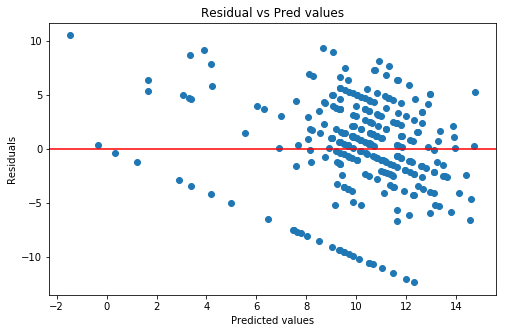

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(pred_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residual vs Pred values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

In [38]:
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, f_results.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 90.14118097982157), ('p-value', 2.8321312903567996e-17), ('f-value', 18.078132678614985), ('f p-value', 6.706103099757775e-20)]


In [39]:
# p value is low and the Homoscedasticity assumption should be rejected. 

In [40]:
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results)
print(list(zip(rnames, rainbow)))

[('fstat', 0.9250307637590484), ('p-value', 0.6714296254912184)]


In [41]:
#p value is grater than 0.5, so the linearity assumption is not rejected.

### Normality

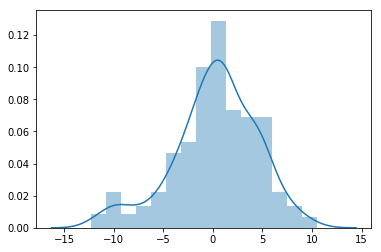

In [42]:
sns.distplot(residuals)
plt.show()

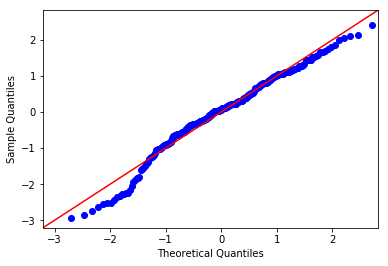

In [43]:
qqplot(residuals,fit=True, line='45')
plt.show()

In [44]:
snames=['The test statistic', 'p-value']
shapiro=shapiro(residuals)
print(list(zip(snames, shapiro)))

[('The test statistic', 0.9750933051109314), ('p-value', 5.073659121990204e-05)]


In [45]:
# There is no enough evidance to reject normality assumption

## Interpretation

In [46]:
# As the summery shows the R^2 is 85.8%, which is a good result. The following variables (studytime, failures,sex_M, higher_yes) have a p value equal to 0 which indicates that they are statsitically significant and those which have positive coefficient have positive effect on Final Grade.